# inpaint by skimage

(480, 640)
(480, 640)


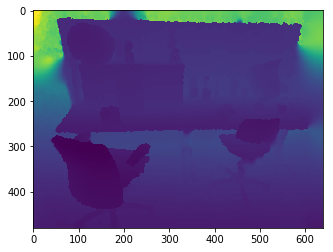

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint
from skimage import io

image_orig = io.imread('/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/depth/1341847982.530781.png')
# plt.imshow(image_orig)


image_orig = image_orig.flatten()
image_mask = np.zeros(image_orig.size)
for i, pixel in enumerate(image_orig.flatten()):
    if (pixel == 0):
        image_mask[i] = 1;

image_mask = image_mask.reshape(480,640)
image_orig = image_orig.reshape(480,640)
# plt.imshow(image_mask)
        

# image_orig = data.astronaut()[0:200, 0:200]

# Create mask with three defect regions: left, middle, right respectively
# mask = np.zeros(image_orig.shape[:-1])
# mask[20:60, 0:20] = 1
# mask[160:180, 70:155] = 1
# mask[30:60, 170:195] = 1

# # Defect image over the same region in each color channel
# image_defect = image_orig.copy()
# for layer in range(image_defect.shape[-1]):
#     image_defect[np.where(mask)] = 0

print(image_orig.shape)
print(image_mask.shape)

image_result = inpaint.inpaint_biharmonic(image_orig, image_mask, multichannel=False)
plt.imshow(image_result)

# fig, axes = plt.subplots(ncols=2, nrows=2)
# ax = axes.ravel()

# ax[0].set_title('Original image')
# ax[0].imshow(image_orig)

# ax[1].set_title('Mask')
# ax[1].imshow(mask, cmap=plt.cm.gray)

# ax[2].set_title('Defected image')
# ax[2].imshow(image_defect)

# ax[3].set_title('Inpainted image')
# ax[3].imshow(image_result)

# for a in ax:
#     a.axis('off')

# fig.tight_layout()
# plt.show()

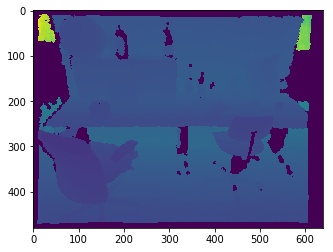

In [3]:
image_orig = io.imread('/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/depth/1341847980.723020.png')
plt.imshow(image_orig)

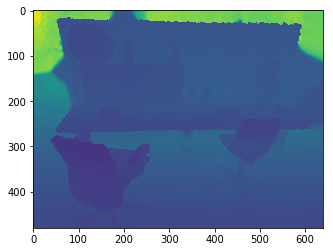

In [1]:
%matplotlib inline

import numpy as np 
import cv2
from skimage import io
import matplotlib.pyplot as plt

image_orig = io.imread('/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/depth/1341847982.530781.png')

image_orig = image_orig.flatten()
image_mask = np.zeros(image_orig.size)
for i, pixel in enumerate(image_orig.flatten()):
    if (pixel == 0):
        image_mask[i] = 1;

image_mask = image_mask.reshape(480,640).astype('uint8')
image_orig = image_orig.reshape(480,640)

image_result = cv2.inpaint(image_orig,image_mask,10,cv2.INPAINT_TELEA)
plt.imshow(image_result)

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/dongwonshin/Desktop/Open3D/build/lib')
from py3d import *

Read TUM dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


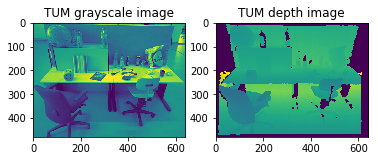

In [82]:
print("Read TUM dataset")
color_raw = read_image("/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/rgb/1341847980.722988.png")
depth_raw = read_image("/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/depth/1341847980.723020.png")
rgbd_image = create_rgbd_image_from_tum_format(color_raw, depth_raw);
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic.prime_sense_default)
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
draw_geometries([pcd])

# Height above the ground

In [73]:
color_raw = read_image("/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/rgb/1341847980.722988.png")
depth_raw = read_image("/media/dongwonshin/Ubuntu Data/Datasets/TUM/3D Object Reconstruction/rgbd_dataset_freiburg3_long_office_household/depth/1341847980.723020.png")
rgbd_image = create_rgbd_image_from_tum_format(color_raw, depth_raw);

depth = np.asarray(rgbd_image.depth)
point_y = np.zeros(depth.shape)

for u, depth_row in enumerate(depth):
    for v, d in enumerate(depth_row):
        point_y[u,v] = (v-320)*d/525

In [74]:
min_y = np.min(point_y)
height = point_y - min_y

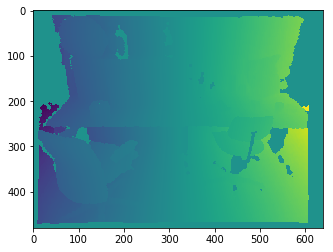

In [75]:
plt.imshow(height)

# Horizontal disparity

In [77]:
disparity = np.zeros(depth.shape)
for u, depth_row in enumerate(depth):
    for v, d in enumerate(depth_row):
        if (d != 0):
            disparity[u,v] = 120/d

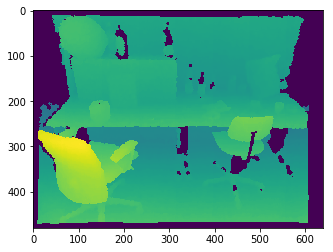

In [79]:
plt.imshow(disparity)

In [85]:
estimate_normals(pcd, search_param = KDTreeSearchParamHybrid(radius = 0.1, max_nn = 30))
pcd.normals

std::vector<Eigen::Vector3d> with 244280 elements.
Use numpy.asarray() to access data.